# **Boosting Algorithms**

## **Data Preprocessing**

In [1077]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

## **Meteorology Dataset**

In [1078]:
df = pd.read_csv("meteo.csv")

In [1079]:
df.head()

,date,hour,dew_point,wind_direction,wind_speed,pressure,temperature,relative_humidity,precipitation
0,1/1/2015,0,22.7,260.0,4.0,1011.2,25.6,83.9,NaN
1,1/1/2015,1,22.6,270.0,4.0,1010.6,25.4,84.6,NaN
2,1/1/2015,2,22.8,270.0,4.0,1010.5,25.0,87.5,NaN
3,1/1/2015,3,22.8,270.0,4.0,1010.4,24.8,88.9,NaN
4,1/1/2015,4,22.9,260.0,4.0,1010.3,24.6,90.4,NaN


In [1080]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65804 entries, 0 to 65803
Data columns (total 9 columns):
date                 65804 non-null object
hour                 65804 non-null int64
dew_point            65723 non-null float64
wind_direction       65778 non-null float64
wind_speed           65716 non-null float64
pressure             65787 non-null float64
temperature          65763 non-null float64
relative_humidity    65723 non-null float64
precipitation        3353 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.5+ MB


In [1081]:
df['hour'] = df['hour'].astype('str')

In [1082]:
h=df["hour"].str.zfill(2)
df["date"]  = df['date'] + " " + h + ":00:00"

In [1083]:
df["date"] = pd.to_datetime(df['date'])

In [1084]:
df.head()

,date,hour,dew_point,wind_direction,wind_speed,pressure,temperature,relative_humidity,precipitation
0,2015-01-01 00:00:00,0,22.7,260.0,4.0,1011.2,25.6,83.9,NaN
1,2015-01-01 01:00:00,1,22.6,270.0,4.0,1010.6,25.4,84.6,NaN
2,2015-01-01 02:00:00,2,22.8,270.0,4.0,1010.5,25.0,87.5,NaN
3,2015-01-01 03:00:00,3,22.8,270.0,4.0,1010.4,24.8,88.9,NaN
4,2015-01-01 04:00:00,4,22.9,260.0,4.0,1010.3,24.6,90.4,NaN


In [1085]:
df.drop(columns=['hour'], inplace=True)

### **Converting from hour to daily**

In [1086]:
df1 = pd.DataFrame(columns = ['date', 'dew_point', 'wind_speed', 'pressure',
'temperature','relative_humidity','precipitation'], data = df)

In [1087]:
df2 = pd.DataFrame(columns = ['date', 'wind_direction'], data = df)
df2.head()

,date,wind_direction
0,2015-01-01 00:00:00,260.0
1,2015-01-01 01:00:00,270.0
2,2015-01-01 02:00:00,270.0
3,2015-01-01 03:00:00,270.0
4,2015-01-01 04:00:00,260.0


In [1088]:
mt1 = df1.resample('D', on='date').mean()

In [1089]:
mt1['precipitation'] = mt1['precipitation'].replace(np.nan, 0)

In [1090]:
mt1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2745 entries, 2015-01-01 to 2022-07-07
Freq: D
Data columns (total 6 columns):
dew_point            2745 non-null float64
wind_speed           2745 non-null float64
pressure             2745 non-null float64
temperature          2745 non-null float64
relative_humidity    2745 non-null float64
precipitation        2745 non-null float64
dtypes: float64(6)
memory usage: 150.1 KB


In [1091]:
import scipy.stats

def mode(xs):
    return scipy.stats.mode(xs)[0][0]

In [1092]:
mt2 = df2.resample('D', on='date').apply(mode)

The input array could not be properly checked for nan values. nan values will be ignored.


In [1093]:
mt1.head()

,dew_point,wind_speed,pressure,temperature,relative_humidity,precipitation
date,,,,,,
2015-01-01,23.270833,3.416667,1010.283333,26.179167,84.245833,12.966667
2015-01-02,23.391667,3.708333,1010.887500,26.079167,85.604167,10.600000
2015-01-03,23.433333,3.416667,1010.804167,25.979167,86.312500,8.420000
2015-01-04,22.750000,4.250000,1009.800000,25.608333,84.591667,6.466667
2015-01-05,23.275000,5.500000,1009.275000,27.620833,78.104167,1.650000


In [1094]:
mt2.head()

,date,wind_direction
date,,
2015-01-01,2015-01-01,260.0
2015-01-02,2015-01-02,270.0
2015-01-03,2015-01-03,0.0
2015-01-04,2015-01-04,260.0
2015-01-05,2015-01-05,250.0


In [1095]:
mt2.drop(columns=['date'], inplace=True)

In [1096]:
mt_baru = pd.merge(mt1, mt2, on='date', how='outer')

In [1097]:
mt_baru.head()

,dew_point,wind_speed,pressure,temperature,relative_humidity,precipitation,wind_direction
date,,,,,,,
2015-01-01,23.270833,3.416667,1010.283333,26.179167,84.245833,12.966667,260.0
2015-01-02,23.391667,3.708333,1010.887500,26.079167,85.604167,10.600000,270.0
2015-01-03,23.433333,3.416667,1010.804167,25.979167,86.312500,8.420000,0.0
2015-01-04,22.750000,4.250000,1009.800000,25.608333,84.591667,6.466667,260.0
2015-01-05,23.275000,5.500000,1009.275000,27.620833,78.104167,1.650000,250.0


In [1098]:
mt_baru.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2745 entries, 2015-01-01 to 2022-07-07
Data columns (total 7 columns):
dew_point            2745 non-null float64
wind_speed           2745 non-null float64
pressure             2745 non-null float64
temperature          2745 non-null float64
relative_humidity    2745 non-null float64
precipitation        2745 non-null float64
wind_direction       2745 non-null float64
dtypes: float64(7)
memory usage: 171.6 KB


### **Labeling the category level of wind direction**

In [1099]:
def wd_level(row):
    if row == 0:
        result = 'utara'
    elif 0 < row < 90:
        result = 'timur laut'
    elif row == 90:
        result = 'timur'
    elif 90 < row < 180:
        result = 'tenggara'
    elif row == 180:
        result = 'selatan'
    elif 180 < row < 270:
        result = 'barat daya'
    elif row == 270:
        result = 'barat'
    elif 270 < row < 360:
        result = 'barat laut'
    elif row == 360:
        result = 'utara'
    else:
        result = 'unknown'
    return result

In [1100]:
mt_baru['wind_direction'] = mt_baru['wind_direction'].apply(wd_level)

In [1101]:
mt_baru.head()

,dew_point,wind_speed,pressure,temperature,relative_humidity,precipitation,wind_direction
date,,,,,,,
2015-01-01,23.270833,3.416667,1010.283333,26.179167,84.245833,12.966667,barat daya
2015-01-02,23.391667,3.708333,1010.887500,26.079167,85.604167,10.600000,barat
2015-01-03,23.433333,3.416667,1010.804167,25.979167,86.312500,8.420000,utara
2015-01-04,22.750000,4.250000,1009.800000,25.608333,84.591667,6.466667,barat daya
2015-01-05,23.275000,5.500000,1009.275000,27.620833,78.104167,1.650000,barat daya


In [1102]:
mt_baru.to_csv('mt_xgb.csv', index= True)

## **PM2.5 Dataset**

In [1103]:
# data pm25
data_pm = pd.read_csv("pm25_clean.csv")

In [1104]:
data_pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2739 entries, 0 to 2738
Data columns (total 2 columns):
date     2739 non-null object
pm2.5    2358 non-null float64
dtypes: float64(1), object(1)
memory usage: 42.9+ KB


In [1105]:
data_pm.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

### **Labeling the category level of PM2.5**

In [1106]:
def pm_level(row):
    if row > 40.5:
        result = 'tidak sehat'
    elif row > 28.25:
        result = 'sedang'
    else:
        result = 'baik'
    return result

In [1107]:
data_pm['pm2.5'] = data_pm['pm2.5'].apply(pm_level)

In [1108]:
data_pm.head()

,date,pm2.5
354,2015-12-21,baik
355,2015-12-22,baik
356,2015-12-23,baik
357,2015-12-24,baik
358,2015-12-25,baik


In [1109]:
data_pm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2358 entries, 354 to 2738
Data columns (total 2 columns):
date     2358 non-null object
pm2.5    2358 non-null object
dtypes: object(2)
memory usage: 55.3+ KB


In [1110]:
data_pm.to_csv('pm_xgb.csv', index= False)

## **Merging Data**

In [1111]:
# data fix banget

pm = pd.read_csv("pm_xgb.csv")
mt = pd.read_csv("mt_xgb.csv")

In [1112]:
data_fix = pd.merge(mt, pm, on='date', how='left')

In [1113]:
data_fix.head()

,date,dew_point,wind_speed,pressure,temperature,relative_humidity,precipitation,wind_direction,pm2.5
0,2015-01-01,23.270833,3.416667,1010.283333,26.179167,84.245833,12.966667,barat daya,NaN
1,2015-01-02,23.391667,3.708333,1010.887500,26.079167,85.604167,10.600000,barat,NaN
2,2015-01-03,23.433333,3.416667,1010.804167,25.979167,86.312500,8.420000,utara,NaN
3,2015-01-04,22.750000,4.250000,1009.800000,25.608333,84.591667,6.466667,barat daya,NaN
4,2015-01-05,23.275000,5.500000,1009.275000,27.620833,78.104167,1.650000,barat daya,NaN


In [1114]:
data_fix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2745 entries, 0 to 2744
Data columns (total 9 columns):
date                 2745 non-null object
dew_point            2745 non-null float64
wind_speed           2745 non-null float64
pressure             2745 non-null float64
temperature          2745 non-null float64
relative_humidity    2745 non-null float64
precipitation        2745 non-null float64
wind_direction       2745 non-null object
pm2.5                2358 non-null object
dtypes: float64(6), object(3)
memory usage: 214.5+ KB


In [1115]:
data_fix.to_csv('data_xgb.csv', index= False)

## **Final Dataset**

In [1116]:
df = pd.read_csv('data_xgb.csv')

In [1117]:
df.head()

,date,dew_point,wind_speed,pressure,temperature,relative_humidity,precipitation,wind_direction,pm2.5
0,2015-01-01,23.270833,3.416667,1010.283333,26.179167,84.245833,12.966667,barat daya,NaN
1,2015-01-02,23.391667,3.708333,1010.887500,26.079167,85.604167,10.600000,barat,NaN
2,2015-01-03,23.433333,3.416667,1010.804167,25.979167,86.312500,8.420000,utara,NaN
3,2015-01-04,22.750000,4.250000,1009.800000,25.608333,84.591667,6.466667,barat daya,NaN
4,2015-01-05,23.275000,5.500000,1009.275000,27.620833,78.104167,1.650000,barat daya,NaN


In [1118]:
# missing values
df.isnull().sum()

date                   0
dew_point              0
wind_speed             0
pressure               0
temperature            0
relative_humidity      0
precipitation          0
wind_direction         0
pm2.5                387
dtype: int64

In [1119]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [1120]:
# missing values
df.isnull().sum()

date                 0
dew_point            0
wind_speed           0
pressure             0
temperature          0
relative_humidity    0
precipitation        0
wind_direction       0
pm2.5                0
dtype: int64

In [1121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2358 entries, 354 to 2738
Data columns (total 9 columns):
date                 2358 non-null object
dew_point            2358 non-null float64
wind_speed           2358 non-null float64
pressure             2358 non-null float64
temperature          2358 non-null float64
relative_humidity    2358 non-null float64
precipitation        2358 non-null float64
wind_direction       2358 non-null object
pm2.5                2358 non-null object
dtypes: float64(6), object(3)
memory usage: 184.2+ KB


In [1122]:
# delete date column
df.drop(columns=['date'], inplace=True)

## **Data Visualization**

### **Frequency Distribution: Categorical Variables**

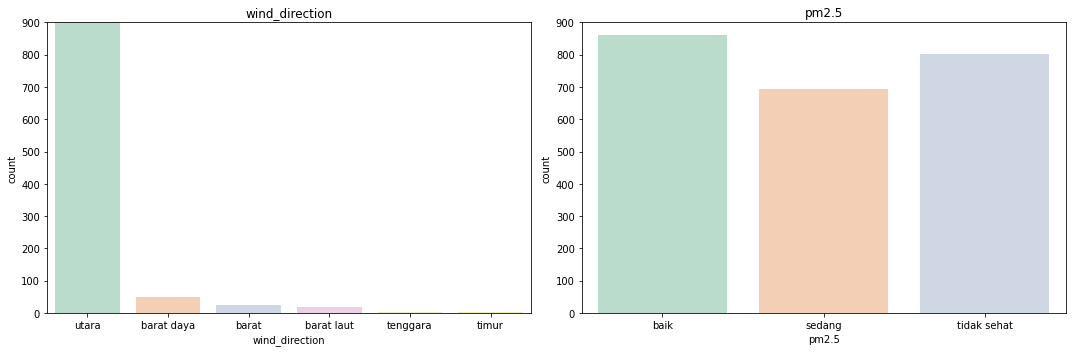

In [1123]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
titles = ['wind_direction','pm2.5']

ax_title_pairs = zip(axs.flat, titles)

for ax, title in ax_title_pairs:
    sns.countplot(x=title, data=df, palette='Pastel2', ax=ax)
    ax.set_title(title)
    ax.set_ylim(0, 900)

plt.tight_layout()

### **Frequency Distribution: Continuous Variables**

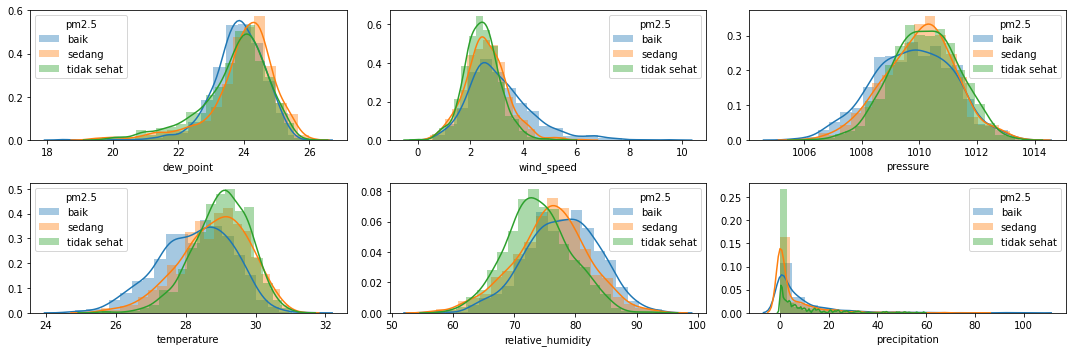

In [1124]:
df_grouped = df.groupby(by='pm2.5')
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 5))
cols = ['dew_point','wind_speed','pressure','temperature','relative_humidity','precipitation']

ax=ax.ravel()
for i in range(len(cols)):
    sns.distplot(df_grouped.get_group('baik')[cols[i]], bins=20, ax=ax[i], label='baik')
    sns.distplot(df_grouped.get_group('sedang')[cols[i]], bins=20, ax=ax[i], label='sedang')
    sns.distplot(df_grouped.get_group('tidak sehat')[cols[i]], bins=20, ax=ax[i], label='tidak sehat')
    ax[i].legend(title='pm2.5')

fig.tight_layout()

### **Box Plots : Outlier Detection**

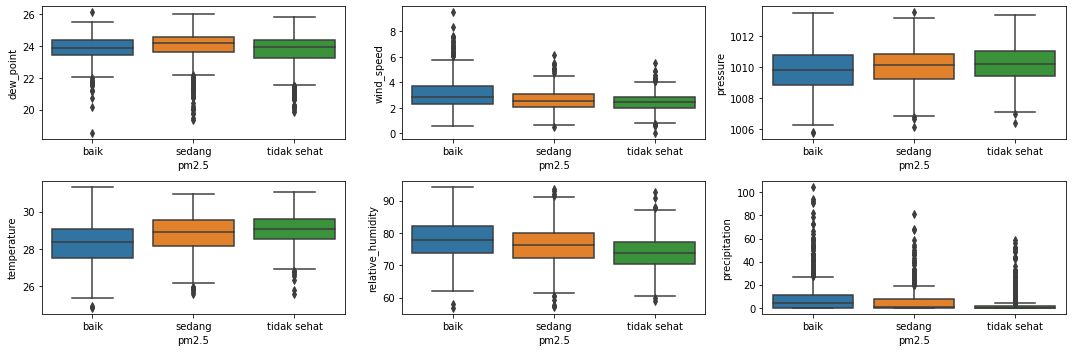

In [1125]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 5))
cols = ['dew_point','wind_speed','pressure','temperature','relative_humidity','precipitation']

axes=axes.ravel()
for i in range(len(cols)):
    sns.boxplot(x='pm2.5', y=cols[i], data=df, ax=axes[i])
fig.tight_layout()

## **Spearman Correlation**

In [1126]:
from scipy.stats.stats import spearmanr

#calculation correlation coefficient and p-value between x and y
dew_point_corr = spearmanr(df['dew_point'], df['pm2.5'])
wind_speed_corr = spearmanr(df['wind_speed'], df['pm2.5'])
pressure_corr = spearmanr(df['pressure'], df['pm2.5'])
temperature_corr = spearmanr(df['temperature'], df['pm2.5'])
relative_humidity_corr = spearmanr(df['relative_humidity'], df['pm2.5'])
precipitation_corr = spearmanr(df['precipitation'], df['pm2.5'])

corr_coef = pd.DataFrame({
    'variables' : ['dew_point', 'wind_speed', 'pressure', 'temperature', 'relative_humidity', 'precipitation'],
    'pearson (r)' : [dew_point_corr[0], wind_speed_corr[0], pressure_corr[0], temperature_corr[0], relative_humidity_corr[0], precipitation_corr[0]],
    'p-value' : [dew_point_corr[1], wind_speed_corr[1], pressure_corr[1], temperature_corr[1], relative_humidity_corr[1], precipitation_corr[1]]
})
corr_coef

The input array could not be properly checked for nan values. nan values will be ignored.


,variables,pearson (r),p-value
0,dew_point,-0.012391,5.475583e-01
1,wind_speed,-0.256680,8.623836e-37
2,pressure,0.131198,1.603591e-10
3,temperature,0.303545,1.898453e-51
4,relative_humidity,-0.280875,5.293664e-44
5,precipitation,-0.338828,1.980301e-64


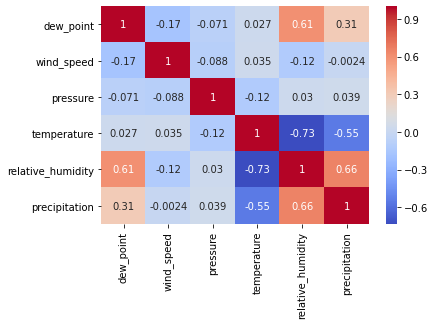

In [1127]:
corr = df.corr(method = 'spearman')
sns.heatmap(corr, annot = True, cmap='coolwarm')
plt.show()

In [1128]:
# delete dew point & pressure
df.drop(columns=['dew_point', 'pressure'], inplace=True)

In [1129]:
df.head()

,wind_speed,temperature,relative_humidity,precipitation,wind_direction,pm2.5
354,4.541667,27.608333,75.241667,11.0,utara,baik
355,3.083333,29.258333,69.654167,0.0,utara,baik
356,4.250000,29.533333,68.500000,0.0,barat daya,baik
357,4.041667,29.433333,66.437500,0.0,utara,baik
358,2.958333,28.866667,74.758333,0.0,utara,baik


## **Feature Scalling**

In [1130]:
# Categorical Columns

from sklearn.preprocessing import LabelEncoder

df['wind_direction'] = LabelEncoder().fit_transform(df['wind_direction'])
df['pm2.5'] = LabelEncoder().fit_transform(df['pm2.5'])

# Numerical Columns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline 

numerical_columns = list(df.iloc[:,:-2].columns)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns)],
    remainder='passthrough')

## Applying Column Transformer
df.iloc[:,:-2] = preprocessor.fit_transform(df.iloc[:,:-2])

### **Splitting Data**

In [1131]:
# separating features and label

x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [1132]:
# splitting dataset into training set and testing set

from sklearn.model_selection import train_test_split

data_splits = train_test_split(x, y, test_size=0.2, random_state=42,
                               shuffle=True, stratify=y)
x_train, x_test, y_train, y_test = data_splits

# describes info about train and test set
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (1886, 5)
Number transactions y_train dataset:  (1886,)
Number transactions x_test dataset:  (472, 5)
Number transactions y_test dataset:  (472,)


In [1133]:
pd.Series(y_train).value_counts()

0    688
2    642
1    556
Name: pm2.5, dtype: int64

In [1134]:
pd.Series(y_test).value_counts()

0    172
2    161
1    139
Name: pm2.5, dtype: int64

## **Data Modeling**

### **Import Libraries**

In [1135]:
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
import shap

### **AdaBoost**

In [1137]:
from sklearn.ensemble import AdaBoostClassifier
import time

ada_model = AdaBoostClassifier(algorithm='SAMME', random_state=1, learning_rate=0.7, n_estimators=100)
training_start = time.perf_counter()
ada_model.fit(x_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = ada_model.predict(x_test)
prediction_end = time.perf_counter()
acc_ada = metrics.accuracy_score(y_test,preds)
score_ada = metrics.f1_score(y_test,preds,average='weighted')
mcc_ada = metrics.matthews_corrcoef(y_test,preds)
ada_train_time = training_end-training_start
ada_prediction_time = prediction_end-prediction_start

print("AdaBoost's prediction accuracy is: %3.2f" % (acc_ada))
print("AdaBoost's prediction f1-score is: %3.2f" % (score_ada))
print("AdaBoost's prediction MCC is: %3.2f" % (mcc_ada))

print("Time consumed for training: %4.3f" % (ada_train_time))
print("Time consumed for prediction: %6.5f seconds" % (ada_prediction_time))
print(ada_model)

AdaBoost's prediction accuracy is: 0.54
AdaBoost's prediction f1-score is: 0.52
AdaBoost's prediction MCC is: 0.31
Time consumed for training: 0.172
Time consumed for prediction: 0.01016 seconds
AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.7,
                   n_estimators=100, random_state=1)


### **Gradient Boosting**

In [1139]:
from sklearn.ensemble import GradientBoostingClassifier
import time

gb_model = GradientBoostingClassifier(random_state=1, learning_rate=0.04, n_estimators=500)
training_start = time.perf_counter()
gb_model.fit(x_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = gb_model.predict(x_test)
prediction_end = time.perf_counter()
acc_gb = metrics.accuracy_score(y_test,preds)
score_gb = metrics.f1_score(y_test,preds,average='weighted')
mcc_gb = metrics.matthews_corrcoef(y_test,preds)
gb_train_time = training_end-training_start
gb_prediction_time = prediction_end-prediction_start

print("GradientBoosting's prediction accuracy is: %3.2f" % (acc_gb))
print("GradientBoosting's prediction f1-score is: %3.2f" % (score_gb))
print("GradientBoosting's prediction MCC is: %3.2f" % (mcc_gb))

print("Time consumed for training: %4.3f" % (gb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (gb_prediction_time))
print(gb_model)

GradientBoosting's prediction accuracy is: 0.53
GradientBoosting's prediction f1-score is: 0.52
GradientBoosting's prediction MCC is: 0.29
Time consumed for training: 2.213
Time consumed for prediction: 0.01178 seconds
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.04, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


### **XGBoost**

In [1141]:
# import XGBClassifier
from xgboost import XGBClassifier
import time

# declare parameters
params = {
            'objective':'multi:softprob',
            'n_estimators':100,
            'random_state':1,
            'learning_rate':1,
            'max_depth':1,
            'min_child_weight':6,
            'gamma':0.6,
            'reg_alpha':1
        }
            
         
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)
training_start = time.perf_counter()

# fit the classifier to the training data
xgb_clf.fit(x_train, y_train)
training_end = time.perf_counter()

# make predictions on test data
prediction_start = time.perf_counter()
preds = xgb_clf.predict(x_test)
prediction_end = time.perf_counter()
acc_xgbp = metrics.accuracy_score(y_test,preds)
score_xgbp = metrics.f1_score(y_test,preds,average='weighted')
mcc_xgbp = metrics.matthews_corrcoef(y_test,preds)
xgbp_train_time = training_end-training_start
xgbp_prediction_time = prediction_end-prediction_start

print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgbp))
print("XGBoost's prediction f1-score is: %3.2f" % (score_xgbp))
print("XGBoost's prediction MCC is: %3.2f" % (mcc_xgbp))

print("Time consumed for training: %4.3f seconds" % (xgbp_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgbp_prediction_time))
print(xgb_clf)

XGBoost's prediction accuracy is: 0.54
XGBoost's prediction f1-score is: 0.53
XGBoost's prediction MCC is: 0.31
Time consumed for training: 0.192 seconds
Time consumed for prediction: 0.00744 seconds
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.6, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', learning_rate=1,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=1,
              max_leaves=0, min_child_weight=6, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=1, reg_alpha=1, ...)


### **CatBoost**

In [1143]:
from catboost import CatBoostClassifier
import time

catgb_model = CatBoostClassifier(n_estimators=500, learning_rate=0.001, random_state=1)
training_start = time.perf_counter()
catgb_model.fit(x_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = catgb_model.predict(x_test)
prediction_end = time.perf_counter()
acc_catgb = metrics.accuracy_score(y_test,preds)
score_catgb = metrics.f1_score(y_test,preds,average='weighted')
mcc_catgb = metrics.matthews_corrcoef(y_test,preds)
catgb_train_time = training_end-training_start
catgb_prediction_time = prediction_end-prediction_start

print("CatBoost's prediction accuracy is: %3.2f" % (acc_catgb))
print("CatBoost's prediction f1_score is: %3.2f" % (score_catgb))
print("CatBoost's prediction MCC is: %3.2f" % (mcc_catgb))

print("Time consumed for training: %4.3f" % (catgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (catgb_prediction_time))
print(catgb_model)

0:	learn: 1.0983700	total: 8.7ms	remaining: 4.34s
1:	learn: 1.0981489	total: 12.7ms	remaining: 3.16s
2:	learn: 1.0979272	total: 15.8ms	remaining: 2.62s
3:	learn: 1.0976794	total: 18.8ms	remaining: 2.33s
4:	learn: 1.0974715	total: 21.9ms	remaining: 2.17s
5:	learn: 1.0972568	total: 25.3ms	remaining: 2.08s
6:	learn: 1.0970135	total: 28.7ms	remaining: 2.02s
7:	learn: 1.0967715	total: 31.8ms	remaining: 1.96s
8:	learn: 1.0965169	total: 35.2ms	remaining: 1.92s
9:	learn: 1.0963026	total: 38.7ms	remaining: 1.9s
10:	learn: 1.0960737	total: 43.2ms	remaining: 1.92s
11:	learn: 1.0958463	total: 47.4ms	remaining: 1.93s
12:	learn: 1.0956349	total: 51.2ms	remaining: 1.92s
13:	learn: 1.0954125	total: 54.8ms	remaining: 1.9s
14:	learn: 1.0951689	total: 59ms	remaining: 1.91s
15:	learn: 1.0949518	total: 62.6ms	remaining: 1.89s
16:	learn: 1.0947176	total: 66.1ms	remaining: 1.88s
17:	learn: 1.0944816	total: 69.7ms	remaining: 1.87s
18:	learn: 1.0942716	total: 74.1ms	remaining: 1.88s
19:	learn: 1.0940409	total:

### **LightGBM**

In [1145]:
from lightgbm import LGBMClassifier
import time

lgb_model = LGBMClassifier(objective='multiclass', random_state=1, learning_rate=0.002, n_estimators=130,
                            max_depth=7, reg_alpha=0.2)
training_start = time.perf_counter()
lgb_model.fit(x_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = lgb_model.predict(x_test)
prediction_end = time.perf_counter()
acc_lgb = metrics.accuracy_score(y_test,preds)
score_lgb = metrics.f1_score(y_test,preds,average='weighted')
mcc_lgb = metrics.matthews_corrcoef(y_test,preds)
lgb_train_time = training_end-training_start
lgb_prediction_time = prediction_end-prediction_start

print("LightGBM's prediction accuracy is: %3.2f" % (acc_lgb))
print("LightGBM's prediction f1_score is: %3.2f" % (score_lgb))
print("LightGBM's prediction f1_score is: %3.2f" % (mcc_lgb))

print("Time consumed for training: %4.3f" % (lgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (lgb_prediction_time))
print(lgb_model)

LightGBM's prediction accuracy is: 0.53
LightGBM's prediction f1_score is: 0.46
LightGBM's prediction f1_score is: 0.30
Time consumed for training: 0.491
Time consumed for prediction: 0.01150 seconds
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.002, max_depth=7,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=130, n_jobs=-1, num_leaves=31,
               objective='multiclass', random_state=1, reg_alpha=0.2,
               reg_lambda=0.0, silent='warn', subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


### **Comparing Models**

In [1146]:
results = pd.DataFrame({
    'Model': ['AdaBoost', 'Gradient Boosting', 'XGBoost', 'CatBoost', 'LightGBM'],
    'Accuracy Score': [acc_ada, acc_gb, acc_xgbp, acc_catgb, acc_lgb],
    'F1-Score': [score_ada, score_gb, score_xgbp, score_catgb, score_lgb],
    'MCC Score': [mcc_ada, mcc_gb, mcc_xgbp, mcc_catgb, mcc_lgb],
    'Runtime Training': [ada_train_time, gb_train_time, xgbp_train_time, catgb_train_time, lgb_train_time],
    'Runtime Prediction': [ada_prediction_time, gb_prediction_time, xgbp_prediction_time, catgb_prediction_time, lgb_prediction_time]})
result_df = results.sort_values(by='Accuracy Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Accuracy Score,F1-Score,MCC Score,Runtime Training,Runtime Prediction
Model,,,,,
AdaBoost,0.542373,0.524958,0.309133,0.171917,0.010162
XGBoost,0.542373,0.528758,0.308493,0.192145,0.007435
Gradient Boosting,0.531780,0.519925,0.292265,2.213415,0.011780
CatBoost,0.531780,0.478498,0.299638,2.042976,0.002189
LightGBM,0.529661,0.464305,0.301408,0.491492,0.011498


### **Feature Selection**

In [1156]:
importances = pd.DataFrame({
    'Feature': df.drop('pm2.5', axis=1).columns,
    'Importance': xgb_clf.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances

,Importance
Feature,
precipitation,0.482632
wind_speed,0.267251
temperature,0.149241
wind_direction,0.055838
relative_humidity,0.045037


Text(0.5, 1.0, 'Feature Importance')

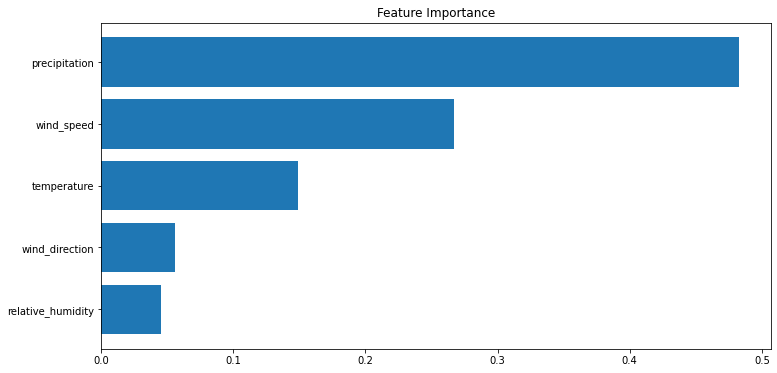

In [1157]:
feature_importance = xgb_clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [1158]:
mybooster = xgb_clf.get_booster()

model_bytearray = mybooster.save_raw()[4:]
def myfun(self=None):
    return model_bytearray

mybooster.save_raw = myfun

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


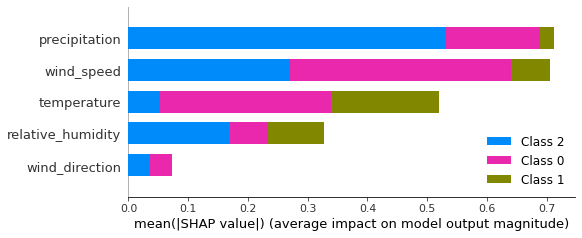

In [1159]:
shap_values = shap.TreeExplainer(xgb_clf).shap_values(x_train)
shap.summary_plot(shap_values, x_train)

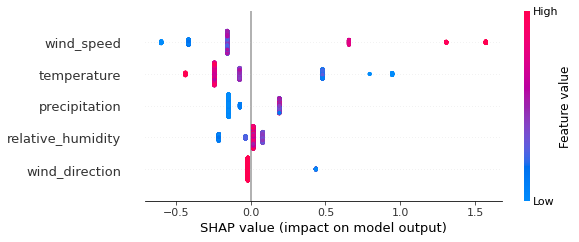

In [1160]:
# class 0
shap.summary_plot(shap_values[0], x_train)

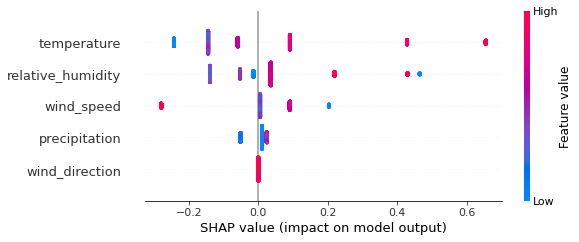

In [1161]:
# class 1
shap.summary_plot(shap_values[1], x_train)

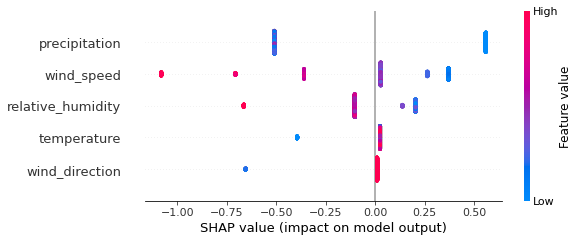

In [1162]:
# class 2
shap.summary_plot(shap_values[2], x_train)

## **Evaluation Model**

In [1163]:
from sklearn.metrics import accuracy_score

# make predictions on test data
y_pred = xgb_clf.predict(x_test)
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.5424


In [1164]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[114  23  35]
 [ 52  39  48]
 [ 29  29 103]]


In [1165]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.66      0.62       172
           1       0.43      0.28      0.34       139
           2       0.55      0.64      0.59       161

    accuracy                           0.54       472
   macro avg       0.52      0.53      0.52       472
weighted avg       0.53      0.54      0.53       472



In [1166]:
from sklearn.metrics import matthews_corrcoef

print(matthews_corrcoef(y_test, y_pred))

0.3084931306897567
